In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("processed_kelulusan.csv")
X = df.drop("Lulus", axis=1)
y = df["Lulus"]

sc = StandardScaler()
Xs = sc.fit_transform(X)

X_train, X_temp, y_train, y_temp = train_test_split(
    Xs, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)

(28, 5) (6, 5) (6, 5)


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")  # klasifikasi biner
])

model.compile(optimizer=keras.optimizers.Adam(1e-3),
              loss="binary_crossentropy",
              metrics=["accuracy","AUC"])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 737 (2.88 KB)

 Trainable params: 737 (2.88 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
es = keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=10, restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100, batch_size=32,
    callbacks=[es], verbose=1
)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 971ms/step - AUC: 0.0102 - accuracy: 0.1071 - loss: 0.8966 - val_AUC: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.9136
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - AUC: 0.0306 - accuracy: 0.2143 - loss: 0.8455 - val_AUC: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.8946
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - AUC: 0.0612 - accuracy: 0.1071 - loss: 0.8224 - val_AUC: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.8758
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - AUC: 0.1786 - accuracy: 0.2857 - loss: 0.7967 - val_AUC: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.8576
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - AUC: 0.0612 - accuracy: 0.2500 - loss: 0.8437 - val_AUC: 0.0000e+00 - val_accuracy: 0.1667 - val_loss: 0.8400
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - AUC: 0.0638 - accuracy: 0.2500 - loss: 0.7914 - val_AUC: 0.0000e+00 - val_accuracy: 0.1667 - val_loss: 0.8227
Epoch 7/100

In [5]:
from sklearn.metrics import classification_report, confusion_matrix

loss, acc, auc = model.evaluate(X_test, y_test, verbose=0)
print("Test Acc:", acc, "AUC:", auc)

y_proba = model.predict(X_test).ravel()
y_pred = (y_proba >= 0.5).astype(int)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3))

Test Acc: 1.0 AUC: 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[[3 0]
 [0 3]]
              precision    recall  f1-score   support

           0      1.000     1.000     1.000         3
           1      1.000     1.000     1.000         3

    accuracy                          1.000         6
   macro avg      1.000     1.000     1.000         6
weighted avg      1.000     1.000     1.000         6



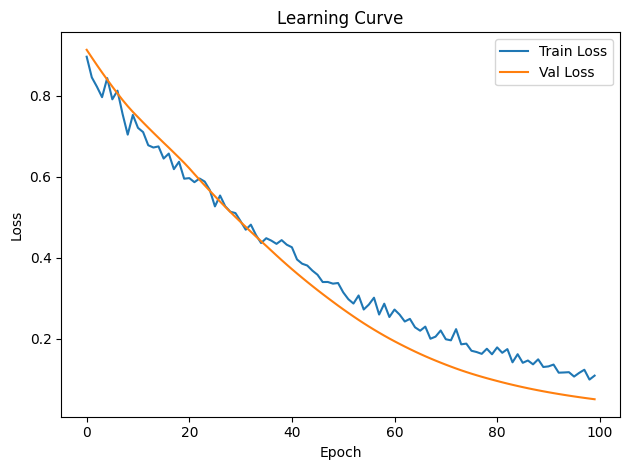

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend()
plt.title("Learning Curve")
plt.tight_layout(); plt.savefig("learning_curve.png", dpi=120)

In [8]:
# === Langkah 0: Import Library ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# === Langkah 1: Siapkan Data ===
df = pd.read_csv("processed_kelulusan.csv")
X = df.drop("Lulus", axis=1)
y = df["Lulus"]

sc = StandardScaler()
Xs = sc.fit_transform(X)

X_train, X_temp, y_train, y_temp = train_test_split(Xs, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

print("Data:", X_train.shape, X_val.shape, X_test.shape)

# === Fungsi pembuat model (bisa ubah parameter) ===
def build_model(neurons=32, optimizer="adam", dropout_rate=0.3, use_l2=False):
    model = keras.Sequential()
    if use_l2:
        reg = keras.regularizers.l2(1e-4)
        model.add(layers.Dense(neurons, activation="relu", kernel_regularizer=reg))
    else:
        model.add(layers.Dense(neurons, activation="relu"))
    
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(16, activation="relu"))
    model.add(layers.Dense(1, activation="sigmoid"))

    if optimizer == "adam":
        opt = keras.optimizers.Adam(learning_rate=1e-3)
    else:
        opt = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

    model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy", keras.metrics.AUC()])
    return model

# === Langkah 2: Eksperimen Model ===
eksperimen = [
    {"nama": "Model 1 (baseline)", "neurons": 32, "optimizer": "adam", "dropout": 0.3, "use_l2": False},
    {"nama": "Model 2", "neurons": 64, "optimizer": "adam", "dropout": 0.3, "use_l2": False},
    {"nama": "Model 3", "neurons": 128, "optimizer": "adam", "dropout": 0.5, "use_l2": True},
    {"nama": "Model 4", "neurons": 64, "optimizer": "sgd", "dropout": 0.3, "use_l2": False},
]

hasil = []

for exp in eksperimen:
    print(f"\n=== {exp['nama']} ===")
    model = build_model(exp["neurons"], exp["optimizer"], exp["dropout"], exp["use_l2"])
    
    es = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True, verbose=0)
    
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=50, batch_size=32,
        callbacks=[es], verbose=0
    )

    # Evaluasi
    y_proba = model.predict(X_test).ravel()
    y_pred = (y_proba >= 0.5).astype(int)
    
    acc = np.mean(y_pred == y_test)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    hasil.append({
        "Model": exp["nama"],
        "Neuron": exp["neurons"],
        "Optimizer": exp["optimizer"],
        "Dropout": exp["dropout"],
        "L2": exp["use_l2"],
        "Accuracy": acc,
        "F1": f1,
        "AUC": auc
    })
    
    # Simpan grafik learning curve
    plt.figure()
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Val Loss")
    plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend()
    plt.title(f"Learning Curve - {exp['nama']}")
    plt.tight_layout(); plt.savefig(f"learning_curve_{exp['nama'].replace(' ', '_')}.png", dpi=120)
    plt.close()

# === Langkah 3: Tampilkan Hasil Eksperimen ===
hasil_df = pd.DataFrame(hasil)
print("\nHasil Perbandingan Model:\n")
print(hasil_df)

# === Langkah 4: Pilih Model Terbaik (berdasarkan AUC/F1 tertinggi) ===
best_idx = hasil_df["AUC"].idxmax()
best_model_info = hasil_df.loc[best_idx]
print("\nModel Terbaik:")
print(best_model_info)


Data: (28, 5) (6, 5) (6, 5)

=== Model 1 (baseline) ===
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step

=== Model 2 ===
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step

=== Model 3 ===
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step

=== Model 4 ===
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

Hasil Perbandingan Model:

                Model  Neuron Optimizer  Dropout     L2  Accuracy   F1  AUC
0  Model 1 (baseline)      32      adam      0.3  False  0.833333  0.8  1.0
1             Model 2      64      adam      0.3  False  1.000000  1.0  1.0
2             Model 3     128      adam      0.5   True  0.833333  0.8  1.0
3             Model 4      64       sgd      0.3  False  1.000000  1.0  1.0

Model Terbaik:
Model        Model 1 (baseline)
Neuron                       32
Optimizer                  adam
Dropout                     0.3
L2                        False
Accuracy               0.833333
F1                          0.8
AUC                         1.0
Name: 0, dtype: object


5 baris pertama:
   IPK  Jumlah_Absensi  Waktu_Belajar_Jam  Lulus
0  3.8               3                 10      1
1  2.5               8                  5      0
2  3.4               4                  7      1
3  2.1              12                  2      0
4  3.9               2                 12      1

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IPK                40 non-null     float64
 1   Jumlah_Absensi     40 non-null     int64  
 2   Waktu_Belajar_Jam  40 non-null     int64  
 3   Lulus              40 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 1.4 KB
None

Bentuk data:
X_train: (28, 3)
X_val: (6, 3)
X_test: (6, 3)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,369 (9.25 KB)

 Trainable params: 2,369 (9.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - AUC: 0.4949 - accuracy: 0.5000 - loss: 0.7084 - val_AUC: 1.0000 - val_accuracy: 0.8333 - val_loss: 0.6547
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.8385 - accuracy: 0.8214 - loss: 0.6456 - val_AUC: 1.0000 - val_accuracy: 0.8333 - val_loss: 0.6014
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.9051 - accuracy: 0.8214 - loss: 0.6182 - val_AUC: 1.0000 - val_accuracy: 0.8333 - val_loss: 0.5523
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.9744 - accuracy: 0.8571 - loss: 0.5775 - val_AUC: 1.0000 - val_accuracy: 0.8333 - val_loss: 0.5051
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.9949 - accuracy: 0.9643 - loss: 0.5268 - val_AUC: 1.0000 - val_accuracy: 0.8333 - val_loss: 0.4623
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 1.0000 - accuracy: 0.9643 - loss: 0.4679 - val_AUC: 1.0000 - val_accuracy: 0.8333 - val_loss: 0.4208
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 1.

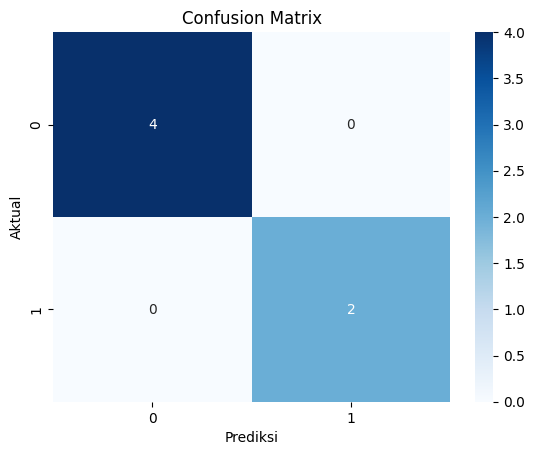


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


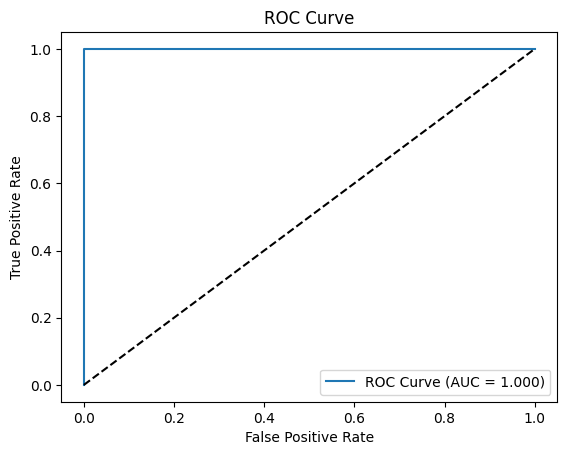


Analisis F1 untuk berbagai threshold:
Threshold 0.1 -> F1: 1.000
Threshold 0.2 -> F1: 1.000
Threshold 0.3 -> F1: 1.000
Threshold 0.4 -> F1: 1.000
Threshold 0.5 -> F1: 1.000
Threshold 0.6 -> F1: 1.000
Threshold 0.7 -> F1: 1.000
Threshold 0.8 -> F1: 1.000
Threshold 0.9 -> F1: 1.000


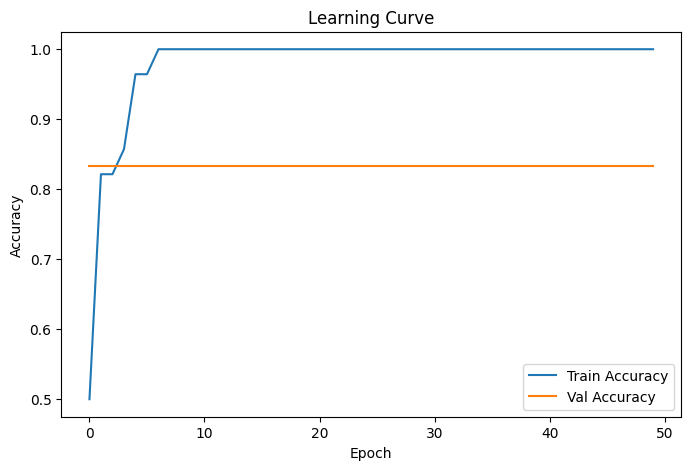

In [4]:
# Artificial Neural Network - Kelulusan Mahasiswa
# Pertemuan 7



import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers


df = pd.read_csv("kelulusan_mahasiswa.csv")
print("5 baris pertama:")
print(df.head())
print("\nInfo dataset:")
print(df.info())

# Pisahkan fitur dan label
X = df.drop(columns=["Lulus"])
y = df["Lulus"]

# Split train, validation, test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalisasi
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

print("\nBentuk data:")
print("X_train:", X_train.shape)
print("X_val:", X_val.shape)
print("X_test:", X_test.shape)

# Bangun Model ANN
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.Dropout(0.3),
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer=keras.optimizers.Adam(1e-3),
              loss="binary_crossentropy",
              metrics=["accuracy", keras.metrics.AUC(name="AUC")])

model.summary()

# Training Model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=8,
    verbose=1
)

#  Evaluasi
loss, acc, auc = model.evaluate(X_test, y_test)
print(f"\nAkurasi: {acc:.3f}, AUC: {auc:.3f}")

# Confusion Matrix
y_pred = (model.predict(X_test) > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC Curve
y_proba = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Analisis Threshold
print("\nAnalisis F1 untuk berbagai threshold:")
thresholds = np.arange(0.1, 1.0, 0.1)
for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    f1 = f1_score(y_test, y_pred_t)
    print(f"Threshold {t:.1f} -> F1: {f1:.3f}")

# Learning Curve
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
